In [56]:
import pandas as pd
import numpy as np
from sklearn import *
from catboost import CatBoostRegressor
import warnings as w
w.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
answer = pd.read_csv("../data/4.체감안전도_통계(2017~2019).csv")
answer2 = pd.read_csv("../data/4.체감안전도_통계(2017~2019).csv")

In [58]:
sub = pd.read_csv("../data/25.결과제출양식.csv")
pol_order = list(sub['경찰서명'])

for i in range(len(pol_order)):
    pol_order[i] = "jur_stn_"+pol_order[i]
    pol_order[i] = pol_order[i].replace(" ","")

In [204]:
tqq = pd.read_csv("q5_train.csv")#,index_col=0)

In [59]:
train_data = pd.read_csv("q5_train.csv")#,index_col=0)
train_data.reset_index(drop=True,inplace=True)
target_data = pd.read_csv("q5_target.csv")#,index_col=0)
y = train_data['overall_q5']
target_data.reset_index(drop=True,inplace=True)

In [60]:
train_data = pd.get_dummies(train_data)
target_data = pd.get_dummies(target_data)

In [61]:
target_data['상반기'] =target_data['date_2020(상반기)']
del target_data['date_2020(상반기)'],target_data['date_2020(하반기)']

train_data['상반기'] = ( train_data['date_2018(상반기)'] | train_data['date_2019(상반기)'] )
# del train_data['date_2018(상반기)'],train_data['date_2018(하반기)'],train_data['date_2019(상반기)'],train_data['date_2019(하반기)']

In [62]:
preprocessing_col = pol_order + ['pub_cnt',
 'vio_total_cnt',
 'report_sx_남성_x',
 'report_sx_불상_x',
 'report_sx_여성_x',
 'rob_total_cnt',
 'report_sx_남성_y',
 'report_sx_불상_y',
 'report_sx_여성_y',
 'report_total_cnt',
 'report_sx_남성',
 'report_sx_불상',
 'report_sx_여성',
 'poor_num',
 'age_합계',
 'age_15세미만',
 'age_15~64세',
 'age_65세이상',
 'age_평균연령',
 'sx_rate_합계',
 'sx_rate_15세미만',
 'sx_rate_15~64세',
 'sx_rate_65세이상',
 'foreign_num',
 'cctv_cnt',
 'bell_us',
 'light_cnt',
 'total_cnt',
 'ofn_sx_기타불명',
 'ofn_sx_남',
 'ofn_sx_여',
 'ofn_sx_성비',
 'ofn_age_10대 이하',
 'ofn_age_20~30대',
 'ofn_age_40~50대',
 'ofn_age_60~70대',
 'ofn_age_80대 이상',
 'ofn_age_미분류',
 'vic_sx_기타불명',
 'vic_sx_남',
 'vic_sx_여',
 'vic_sx_성비',
 'vic_age_10대 이하',
 'vic_age_20~30대',
 'vic_age_40~50대',
 'vic_age_60~70대',
 'vic_age_80대 이상',
 'vic_age_미분류',
 'month_1m',
 'month_2m',
 'month_3m',
 'month_4m',
 'month_5m',
 'month_6m',
 'acc_type_차대사람',
 'acc_type_차대차',
 'acc_type_차량단독',
 'acc_case_공작물충돌',
 'acc_case_기타',
 'acc_case_길가장자리구역통행중',
 'acc_case_도로외이탈',
 'acc_case_보도통행중',
 'acc_case_전도전복',
 'acc_case_정면충돌',
 'acc_case_주/정차차량 충돌',
 'acc_case_차도통행중',
 'acc_case_추돌',
 'acc_case_측면충돌',
 'acc_case_횡단중',
 'acc_case_후진중충돌',
 '접수긴급유형(긴급)',
 '접수긴급유형(중요)',
 '접수긴급유형(일반)',
 '접수긴급유형(민원)',
 '접수긴급유형(기타)',
 '발생요일(일)',
 '발생요일(월)',
 '발생요일(화)',
 '발생요일(수)',
 '발생요일(목)',
 '발생요일(금)',
 '발생요일(토)',
 '새벽(01~05)',
 '아침(06~10)',
 '점심(11~14)',
 '오후(15~18)',
 '저녁(19~21)',
 '심야(22~00)','상반기']

In [63]:
train_data = train_data[preprocessing_col]
target_data = target_data[preprocessing_col]

In [64]:
X = train_data

In [65]:
target_data.sort_values(pol_order,ascending=False,inplace=True)
target_data.reset_index(drop=True,inplace=True)

In [66]:
idx_list = []
for i in answer.index:
    if '서' in answer.loc[i,'medium_category']:
        idx_list.append(i)

In [67]:
tar_sang = target_data[target_data['상반기']==1]
tar_ha = target_data[target_data['상반기']!=1]

tar_sang.reset_index(drop=True,inplace=True)
tar_ha.reset_index(drop=True,inplace=True)

In [68]:
for i in pol_order:
    del train_data[i],tar_sang[i],tar_ha[i]

In [69]:
model = CatBoostRegressor(iterations=800).fit(X, y)

Learning rate set to 0.033519
0:	learn: 3.0525470	total: 56.4ms	remaining: 45.1s
1:	learn: 3.0246139	total: 66.8ms	remaining: 26.7s
2:	learn: 2.9966487	total: 154ms	remaining: 40.8s
3:	learn: 2.9682900	total: 160ms	remaining: 31.8s
4:	learn: 2.9379263	total: 253ms	remaining: 40.3s
5:	learn: 2.9108678	total: 261ms	remaining: 34.5s
6:	learn: 2.8847385	total: 349ms	remaining: 39.5s
7:	learn: 2.8596580	total: 355ms	remaining: 35.1s
8:	learn: 2.8335633	total: 448ms	remaining: 39.4s
9:	learn: 2.8112398	total: 457ms	remaining: 36.1s
10:	learn: 2.7841768	total: 463ms	remaining: 33.2s
11:	learn: 2.7646517	total: 551ms	remaining: 36.2s
12:	learn: 2.7351189	total: 558ms	remaining: 33.8s
13:	learn: 2.7110291	total: 650ms	remaining: 36.5s
14:	learn: 2.6854906	total: 656ms	remaining: 34.3s
15:	learn: 2.6622808	total: 667ms	remaining: 32.7s
16:	learn: 2.6397900	total: 750ms	remaining: 34.6s
17:	learn: 2.6141263	total: 756ms	remaining: 32.9s
18:	learn: 2.5912756	total: 848ms	remaining: 34.8s
19:	learn

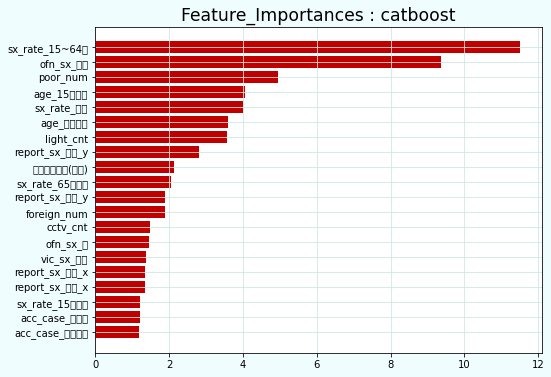

In [70]:
impotances = model.feature_importances_
feature_list = list(zip(model.feature_importances_,X.columns))
feature_list.sort(reverse=True)
feature_list=feature_list[:20]
feature_list.sort(reverse=False)
feature_df = pd.DataFrame(feature_list,columns=["score","feature"])
plt.figure(figsize=(8,6),facecolor="#F0FDFF")
plt.title("Feature_Importances : {}".format(str(model).split('.')[0].split('<')[-1]), fontsize="xx-large")
plt.barh(feature_df["feature"],feature_df["score"],color="#C00000")
plt.grid(color="#CFE8E1")

In [135]:
df = pd.DataFrame(list(zip(model.feature_importances_,X.columns)))
df.columns = ['weight','columns']
df.sort_values(['weight'],axis=0,ascending=False)
# df.head(15)

,weight,columns
21,11.514625,sx_rate_15~64세
31,9.369041,ofn_sx_성비
13,4.946795,poor_num
15,4.058683,age_15세미만
19,3.993796,sx_rate_합계
...,...,...
36,0.094528,ofn_age_80대 이상
60,0.068733,acc_case_도로외이탈
64,0.032895,acc_case_주/정차차량 충돌
42,0.027249,vic_age_10대 이하


In [224]:
# col_num = 24
# row=122
# print(tqq.loc[row,'jur_stn'])
# tester = (X.loc[row,:]).copy()
# target_col_value = X.columns[col_num]
# print("- 타겟 피쳐 : ",target_col_value,"\n- 값 : ", tester[target_col_value])
# print("- 기존 만족도 : ",y[row])
# print("- Feature Importance : ",model.feature_importances_[col_num])
# target_var_value = 1.1
# tester[target_col_value] = tester[target_col_value] * target_var_value
# print("- 수치 10% 증가 시 예측 만족도 : ",model.predict(np.array(tester)))
# print("* 변화량 : ",(model.predict(np.array(tester))-y[row]))

In [160]:
pred = (model.predict(tar_ha)* 0.85525 + model.predict(tar_sang) * 0.15525)

In [161]:
haban_data = answer2[answer2['large_category']=='2019 하반기(경찰서별)']['raw_odder_q4']
sangban_data = answer2[answer2['large_category']=='2019 상반기(경찰서별)']['raw_odder_q4']
haban_data.reset_index(drop=True,inplace=True)
sangban_data.reset_index(drop=True,inplace=True)

In [162]:
prediction = pd.Series(pred)
prediction = pd.Series(prediction)

In [163]:
result = (prediction * 0.9025 ) + (haban_data * 0.1025) + (sangban_data * 0.0525)

In [165]:
result.min()

74.61934313295957

In [22]:
result.to_csv("q5_result.csv")